# Espectrograma - Análisis tiempo frecuencia
***

### Sinopsis

*__Datos:__ 3 segundos de registro EEG lóbulo occipital muestreados a 500 Hz bajo condiciones de relajación con los ojos cerrados.* <br>
*__Objetivo:__ Implementar y utilizar la Transformada Contínua Wavelet con un kernel madre de Morlet, para análisis multiresolución tiempo-frecuencia generando un espectrograma en potencia.* <br>
*__Herramientas:__ Wavelets, análisis multiresolución tiempo-frecuencia, espectrograma.* <br>

### Introducción

Muchos sistemas biológicos y físicos presentan procesos o elementos rítmicos intrínsecos, los cuales, al ser extraidos de manera correcta, pueden arrojar información crucial para el estudio de dichos sistemas; un ejemplo de éstos, son las señales cerebrales extraidas por electroencefalografía (EEG). Dichas estructuras rítmicas temporales inhertes en la serie de tiempo son extraidas y cuantificadas por métodos espectro-temporales como la Transformada Corta de Fourier (STFT) y la Transformada Contínua Wavelet (CWT). Siendo la segunda de ellas una mejor alternativa ya que, en contraste con la opción clásica de STFT, la cual utiliza una sola ventana de análisis, la CWT utiliza múltiples ventanas de análisis adaptables a las componentes rítmicas a estudiar, de aquí el nacimiento de un _análisis multiresolución o de resolución adaptable_. La generación de las ventanas de análisis adaptables es resultado de los ajustes de parámetros del kernel generador o wavelet madre a emplear, que en el caso de wavelets de Morlet significa ajustar su frecuencia de oscilación y apertura de la ventan gaussiana obteniendo un intervalo contínuo de parámetros, de ahí el nombre de transformada contínua. En general, la idea de la CWT es la de visualizar a la señal en varias escalas y analizarlas con múltiples resoluciones. 

### Principio de Incertidumbre de Gabor

En el análisis de señales, la duración de la señal está ampliamente relacionada con la frecuencia mínima diferenciable tal que un ciclo completo de dicha componente frecuencial estará presente en el intervalo completo de la señal para ser correctamente diferenciado de las otras componentes. De forma concreta, para una señal $f$ con periodo $T$[s], el menor intervalo para diferenciar una componente frecuencial, es decir la incertidumbre en el tiempo, es $\Delta f$ está definida como $1/T$[Hz]; adicionalmente, la incertidumbre en el tiempo $\Delta t$ es igual a $T$[s]. La relación entre ambas incertidumbres es una limitante analítica resultante de las resoluciones en tiempo y frecuencia en la cual se indica que la alta precisión en tiempo y frecuencia son mutuamente excluyentes o dicho de otra forma, la frecuencia de una componente no puede ser determinada instantáneamente. Matemáticamente se expresa como: 

$$\Delta t \Delta f \geq \frac{1}{4\pi}$$

Esta relación es de fundamental importancia para el análisis multiresolución ya que como veremos más adelante, obtener una alta resolución en cualquiera de ambas variables implicará una reducción en la resolución complementaria.

### Representación espectro-temporal: El espectrograma

Como se discutió con anterioridad, las señales biomédicas como lo es la señal de EEG, presenta no estacionariedades, lo que resulta en un contenido frecuencial que cambia con el tiempo; es debido a ello que la TF convencional no es suficiente para describir la dinámica de la señal y sus componentes rítmicas (Cassani,2018). A grandes razgos, la idea de una representación espectro-temporal es la de segmentar a la señal en pequeños fragmentos en el tiempo y posteriormente realizar la transformación del dominio del tiempo al de la frecuencia para cada fragmento. Al conjunto de dichas transformaciónes para cada fragmento se le conoce como repreentación espectro-temporal o espectrograma de una señal. El espectrograma es una función cuyas variables son el tiempo y la frecuencia y es evaluada de forma compleja que se define como: 

$$\mathcal{X}(t,f) = ||\mathcal{X}(t,f)||e^{i\theta(t,f)}$$

con $||\mathcal{X}(t,f)||$ la amplitud del espectrograma y $\theta(t,f)$ su fase asociada. De igual forma y análogamente al espectro en potencia, el espectrograma en potencia se define como $||\mathcal{X}(t,f)||^2$. La obtención de esta función es el objetivo final de la CWT y el análisis multiresolución. 

Para demostrar la necesidad de un análsis tiempo-frecuencia a continuación se presenta una señal no estacionaria de muestra y su respectiva TF. 

##### Importe de paqueterias

In [3]:
import pandas as pd  #Paq. p-manejo de archivos de datos
import scipy as sc  #Paq. p-análisis numérico 
import numpy as np  #Paq. p-cálculo numérico
import matplotlib   #Paq. p-graficación
import matplotlib.pyplot as plt
import os.path as os #Paq. p-despliegue de ruta

In [7]:
'''Definimos a la función que generará nuestra señal de muestra la cual recibe un vector de tiempo 
deseado y tres frecuencias distintas a emplear'''
def probe(f1,f2,f3,time):
    #Definimos las tres señales oscilatorias con frecuencias distintas
    s1 = np.sin(2*np.pi*f1*time)
    s2 = np.sin(2*np.pi*f2*time)
    s3 = np.sin(2*np.pi*f3*time)
    dummy = np.concatenate((s1,s2,s3)) #Concatenamos las tres señales obteneindo una nueva señal del triple de duración
    return dummy 

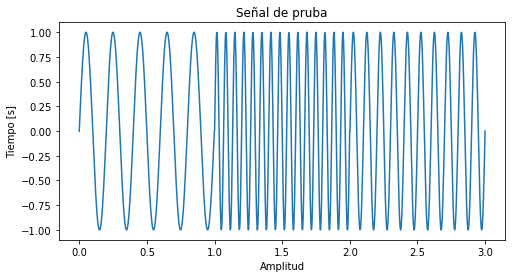

In [522]:
s_time = np.linspace(0,1,500) #Vector de tiempo de cada señal individual
fig, ax = plt.subplots(1,figsize=(8,4))

time = np.linspace(0,3,1500) #Vector de tiempo de la señal resultante
test = probe(5,15,10,s_time)
ax.plot(time,test)
ax.set_title('Señal de prueba')
ax.set_ylabel('Tiempo [s]')
ax.set_xlabel('Amplitud')
plt.show()

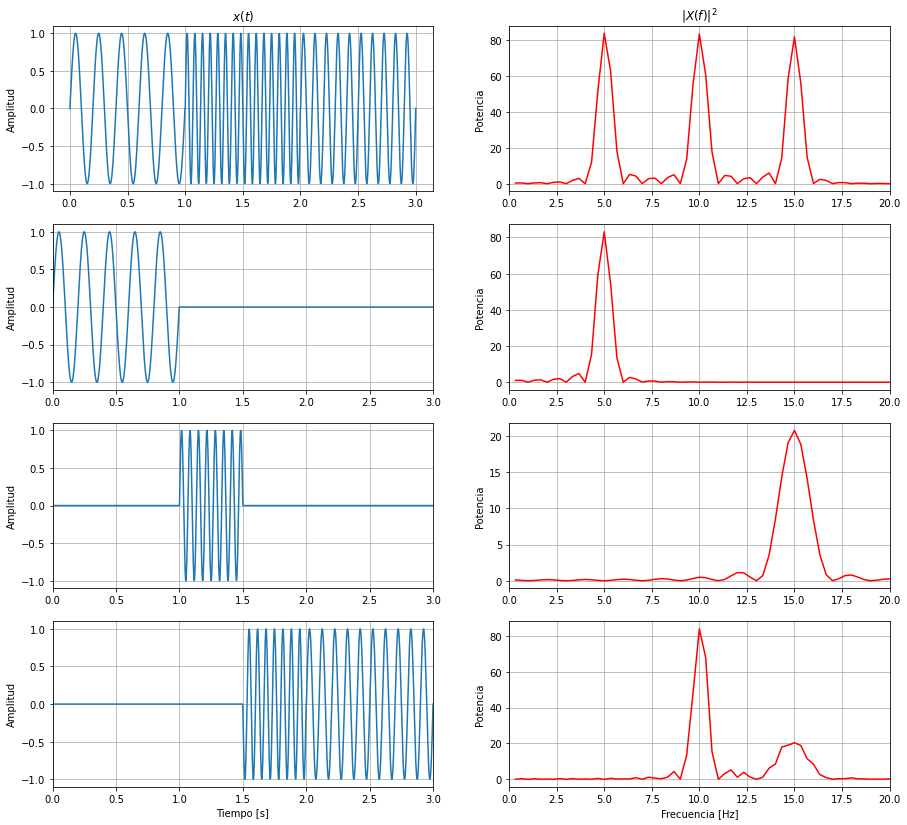

In [59]:
fig,ax = plt.subplots(4,2,figsize=(15,14))

'Graficamos la señal completa'
ax[0][0].plot(time,test)
ax[0][0].set_title(f'$x(t)$')
ax[0][0].set_ylabel('Amplitud')
ax[0][0].grid()

'Cálculo y graficación de la representación espectral'
N = len(test)
T = 1/500
full_fft = np.fft.fft(test)
full_fft = 2.0/N * abs(full_fft)**2
full_fft_fq = sc.fft.fftfreq(N,T)[1:N//2]
ax[0][1].plot(full_fft_fq, full_fft[1:N//2],'red')
ax[0][1].set_title(f'$|X(f)|^2$')
ax[0][1].set_ylabel('Potencia')
ax[0][1].set_xlim(0,20)
ax[0][1].grid()

'Iteramos el código para graficar, segmentando la señal y encamando el resto para conservar la longidu'
test_1 = np.pad(test[0:500],(0,1000),'constant')
ax[1][0].plot(time,test_1)
ax[1][0].set_ylabel('Amplitud')
ax[1][0].grid()
ax[1][0].set_xlim(0,3)

t1_fft = np.fft.fft(test_1)
t1_fft = 2.0/N * abs(t1_fft[1:N//2])**2
ax[1][1].plot(t1_fft_fq, t1_fft,'red')
ax[1][1].set_ylabel('Potencia')
ax[1][1].set_xlim(0,20)
ax[1][1].grid()


test_2 = np.pad(test[500:750],(500,750),'constant')
ax[2][0].plot(time,test_2)
ax[2][0].set_ylabel('Amplitud')
ax[2][0].grid()
ax[2][0].set_xlim(0,3)

t2_fft = np.fft.fft(test_2)
t2_fft = 2.0/N * abs(t2_fft[1:N//2])**2
ax[2][1].plot(t2_fft_fq, t2_fft,'red')
ax[2][1].set_ylabel('Potencia')
ax[2][1].set_xlim(0,20)
ax[2][1].grid()

test_3 = np.pad(test[750:1500],(750,0),'constant')
ax[3][0].plot(time,test_3)
ax[3][0].set_ylabel('Amplitud')
ax[3][0].grid()
ax[3][0].set_xlim(0,3)
ax[3][0].set_xlabel('Tiempo [s]')

t3_fft = np.fft.fft(test_3)
t3_fft = 2.0/N * abs(t3_fft[1:N//2])**2
ax[3][1].plot(t3_fft_fq, t3_fft,'red')
ax[3][1].set_ylabel('Potencia')
ax[3][1].set_xlim(0,20)
ax[3][1].set_xlabel('Frecuencia [Hz]')
ax[3][1].grid()

Con la figura anterior podemos notar el concepto de la representación espectro-temporal de la señal de prueba. El primer par de gráficas muestran la señal en el tiempo y su espectro en potencia respectivo. Mientras que los pares subsecuentes muestran segmentos pequeños ene el tiempo de la señal y su correspondiente representación espectral. Observamos que la señal original está conformada por 3 frecuencia fundamentales, que si bien están claramente representadas se pierde la localización temporal del momento en el que están ocurriendo las oscilaciones. Al segmentar, la señal en fragmentos temporales de menor duración y obtener su representación espectral es posible estudiar la dinámica de la  señal. 

### Análisis multiresolución
        - Una caricatura de la idea

Podemos englobar la idea del análisis multiresolución estudiando el siguiente diagrama

![Análisis multiresolución](res1.png)

En cada uno de los cuadrantes entendemos que las divisiones en cualquiera de los ejes representa el grado de resolución, es decir muchas divisiones en el eje en del tiempo nos habla de un caso con alta resolución temporal, un eje de frecuencia sin divisiones nos habla de nula resolución espectral, etc. 

1. Tomemos el primer cuadrante referente al análisis temporal, es decir nuestra representación temporal de la señal. En este escenario contamos con una excelente resolución temporal resultado de la frecuencia de muestreo con la que se obtuvo la señal. Sin embargo, tenemos una incertidumbre absoluta en cuanto a los componentes frecuenciales. Contamos con toda la información temporal pero con ninguna información espectral. 


2. Ahora tomemos el segundo cuadrante referente a la transformada de Fourier de la señal. En este escenario tomamos toda la señal y la transformamos al dominio de la frecuencia por lo que tendremos una excelente resolución espectral pero a cambio la incertidumbre en el tiempo será absoluta. Contamos con toda la información espectral pero perderemos toda la información temporal


3. Continuando con el tercer cuadrante referente a la trasnformada corta de Fourier STFT.  En este escenario  segmentamos la señal en pequeños fragmentos de igual longitud y obtenemos su representación espectral por lo que el resultado es que obtenemos una resolución similar tanto para el tiempo como para la frecuencia. Contamos con un poco de información espectral y con un poco de información temporal. 


4. Finalmente en el cuarto cuadrante referente a la transformada contínua wavelet CWT, este escenario sigue un proceso iterativo en el que se obtienen distintos niveles de resolución temporal y espectral, es decir, se cuenta con distintas ventanas de análisis con resoluciones temporales y espectrales distintas comenzando por una alta resolución frecuencial y baja temporal, hasta llegar a una alta resolución temporal y baja frecuencial. La generación de estas distintas ventanas de resolución se le conoce como el subespación de resolución. El resultado es la obtención de amplia información espectral para las bajas frecuencias, poca información temporal y espectral para frecuencias medias y alta información temporal y baja espectral para frecuencias altas. 

El motivo de utilizar un análisis multiresolución como lo es CWT debido al límite en resolución impuesto por el principio de incertidumbre de Gabor, puesto que no es posible obtener altas resoluciones temporales y espectrales al mismo tiempo, por lo tanto se distribuyen las resoluciones de acuerdo a donde serán mayor aprovechadas para obtener mayor información de las componentes. Sabemos que las componentes de bajas frecuencias tienen una mayor duración en el tiempo, es decir su periodo es mayor, por lo tanto se espera que éstas no cambien a lo largo del tiempo con gran rapidez, es por ello que no es necesario una alta resolución en el tiempo para detectarlas permitiendo "invertir" una mayor resolución espectral. Por otro lado, las componentes de altas frecuencias tienen una menor duración en el tiempo, es decir su periodo es menor, por lo que se espera que cambien muy rápidamente en el tiempo iluminando la necesidad de contar con una alta resolución temporal para su identificación. Tomando estas consideraciones podemos visualizar al espectrograma generado por CWT como un espectrograma "a la medida" de la información requeridad para cada componente en frecuencia. En resumen, un análisis multiresolución consiste en: 

        - Obtener una menor resolución temporal para las bajas frecuencias y así obtener una mayor resolución temporal
        
        - Obtener una mejor resolución temporal para las frecuencias altas a cambio de reducir la resolución espectral

### Parámetros en la Wavelet

Como se mencionó en la sección anterior buscamos modificar las ventanas de análisis ajustando las resoluciones espectrales y temporales, para lograrlo se emplean los parámetros de la Wavelet madre, que en el caso de la wavelet de Morlet se trata de su frecuencia $f$ y su número de ciclos $n_c$. Es decir, generar un conjunto de parámetros tal que para la identificación de frecuencias bajas en la señal (un parámetro de frecuencia baja de oscilación para la wavelet) el número de ciclo sea tal que la ventana gaussiana sea amplia; de forma análoga, para la identificación de frecuencias bajas en la señal (un parámetro de frecuencia de oscilación alta para la wavelet) elegir un númeor de ciclo tal que la ventana gaussiana sea corta. 

Debido a la naturaleza de la wavelet de Morlet y su representación tanto en el dominio de la frecuencia y el tiempo encerrado por una ventana Gaussiana, una medición importante será la anchura a media altura de dicha ventana, es decir  la FWHM por sus siglas en ingles, esta medición de la ventana nos indica que el ancho del espectro de la curva medido entre dos puntos $x$ de su variable independiente para los cuales su valor en $y$ sea igual a la mitad de su valor máximo. 

In [272]:
'''Importamos nuestras funciones del módulo de funciones del notebook anterior'''
import TWp1 as wv

In [224]:
wv?

Ahora, aprovechando las funciones creadas hasta el momento caracterizaremos los parámetros $f$ y $n_c$ obteniendo el FWHM de la wavelet en el dominio del tiempo y de la frecuencia de acuerdo a los intervalos de parámetros utilizados usualmente en la literatura $n_c \in [2,15]$ y $f \in [2,40]$ generando un mismo número de valores $k =39$ separados linealmente. 

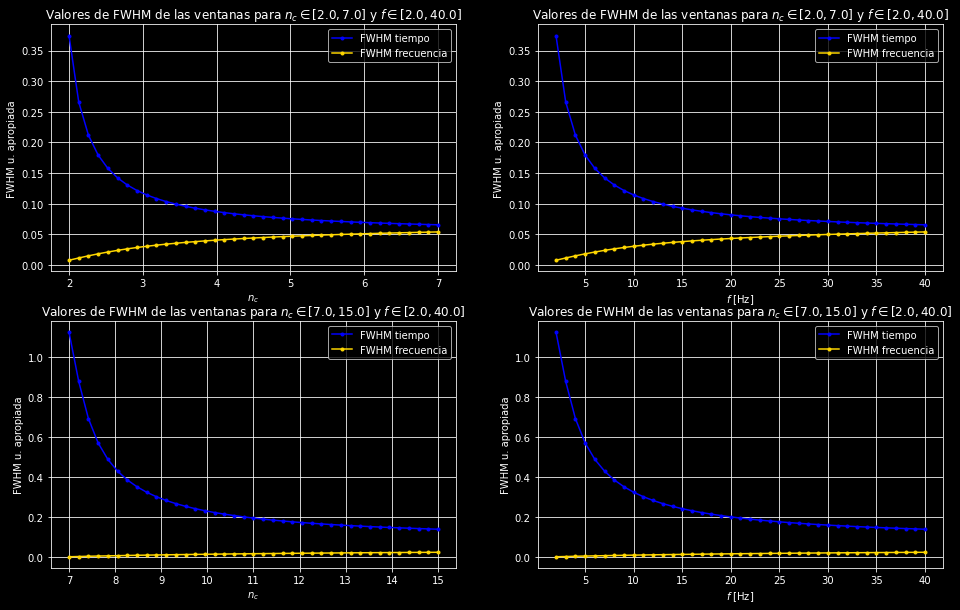

In [626]:
'''Haremos uso del módulo signal de scipy para encontrar y calcular las anchuras de las ventanas gaussianas'''
from scipy.signal import chirp, find_peaks, peak_widths

plt.style.use('dark_background')
fig,ax = plt.subplots(2,2,figsize=(16,10))

n_vec = np.linspace(2,7,39)
f_vec = np.linspace(2,40,39)
nt_fwhm = np.zeros(39)
nf_fwhm = np.zeros(39)
wavs = []
wavs_fft = []
twav = np.linspace(-1,1,500*2)
N = len((wv.morlet(f_vec[0],n_vec[0],twav)))
T = 1/500
fwav = sc.fft.fftfreq(N, T)[1:N//2]
for i in range(len(n_vec)):
    wavelet = wv.morlet(f_vec[i],n_vec[i],twav)
    wavelet_real = np.real(wavelet)/np.real(wavelet).max()
    gauss = wv.gauss(twav,n_vec[i],f_vec[i])
    w_fft = sc.fft.fft(wavelet_real)
    w_fft = abs(w_fft)/abs(w_fft).max()
    
    peaks_t, _ = find_peaks(gauss,1.0)
    tresults_half = peak_widths(gauss,peaks_t,rel_height=0.5)
    
    nt_fwhm[i] = tresults_half[0]/500
    
    peaks_f, _ = find_peaks(abs(w_fft[0:N//2]),1.0)
    fresults_half = peak_widths(abs(w_fft[0:N//2]),peaks_f,rel_height=0.5)
    nf_fwhm[i] = fresults_half[0]/500

ax[0][0].plot(n_vec,nt_fwhm,'.-',c='blue',label='FWHM tiempo')
ax[0][0].plot(n_vec,nf_fwhm,'.-',c='gold', label='FWHM frecuencia')
ax[0][0].set_title(f'Valores de FWHM de las ventanas para $n_c \in [{n_vec[0]},{n_vec[-1]}]$ y $f \in [{f_vec[0]},{f_vec[-1]}]$')
ax[0][0].set_xlabel(f'$n_c$')
ax[0][0].set_ylabel('FWHM u. apropiada')
ax[0][0].legend()
ax[0][0].grid()

ax[0][1].plot(f_vec,nt_fwhm,'.-',c='blue',label='FWHM tiempo')
ax[0][1].plot(f_vec,nf_fwhm,'.-',c='gold', label='FWHM frecuencia')
ax[0][1].set_title(f'Valores de FWHM de las ventanas para $n_c \in [{n_vec[0]},{n_vec[-1]}]$ y $f \in [{f_vec[0]},{f_vec[-1]}]$')
ax[0][1].set_xlabel(f'$f$ [Hz]')
ax[0][1].set_ylabel('FWHM u. apropiada')
ax[0][1].legend()
ax[0][1].grid()

n_vec = np.linspace(7,15,39)
f_vec = np.linspace(2,40,39)
nt_fwhm = np.zeros(39)
nf_fwhm = np.zeros(39)
wavs = []
wavs_fft = []
twav = np.linspace(-1,1,500*2)
N = len((wv.morlet(f_vec[0],n_vec[0],twav)))
T = 1/500
fwav = sc.fft.fftfreq(N, T)[1:N//2]
for i in range(len(n_vec)):
    wavelet = wv.morlet(f_vec[i],n_vec[i],twav)
    wavelet_real = np.real(wavelet)/np.real(wavelet).max()
    gauss = wv.gauss(twav,n_vec[i],f_vec[i])
    w_fft = sc.fft.fft(wavelet_real)
    w_fft = abs(w_fft)/abs(w_fft).max()
    
    peaks_t, _ = find_peaks(gauss,1.0)
    tresults_half = peak_widths(gauss,peaks_t,rel_height=0.5)
    
    nt_fwhm[i] = tresults_half[0]/500
    
    peaks_f, _ = find_peaks(abs(w_fft[0:N//2]),1.0)
    fresults_half = peak_widths(abs(w_fft[0:N//2]),peaks_f,rel_height=0.5)
    nf_fwhm[i] = fresults_half[0]/500

ax[1][0].plot(n_vec,nt_fwhm,'.-',c='blue',label='FWHM tiempo')
ax[1][0].plot(n_vec,nf_fwhm,'.-',c='gold', label='FWHM frecuencia')
ax[1][0].set_title(f'Valores de FWHM de las ventanas para $n_c \in [{n_vec[0]},{n_vec[-1]}]$ y $f \in [{f_vec[0]},{f_vec[-1]}]$')
ax[1][0].set_xlabel(f'$n_c$')
ax[1][0].set_ylabel('FWHM u. apropiada')
ax[1][0].legend()
ax[1][0].grid()

ax[1][1].plot(f_vec,nt_fwhm,'.-',c='blue',label='FWHM tiempo')
ax[1][1].plot(f_vec,nf_fwhm,'.-',c='gold', label='FWHM frecuencia')
ax[1][1].set_title(f'Valores de FWHM de las ventanas para $n_c \in [{n_vec[0]},{n_vec[-1]}]$ y $f \in [{f_vec[0]},{f_vec[-1]}]$')
ax[1][1].set_xlabel(f'$f$ [Hz]')
ax[1][1].set_ylabel('FWHM u. apropiada')
ax[1][1].legend()
ax[1][1].grid()
plt.show()
plt.style.use('default')

Resulta interesante analizar el comportamiento de las ventanas conforme variamos los parámetros propios de la wavelet; para el parámetro $f$ el intervalo de frecuencia se mantendrá ya que en el se incluyen las frecuencias deseadas a analizar que para la señal de EEG la frecuencia usual superior es de 50 [Hz], bajo esta consideración al vairar el segundo parámetro $n_c$ notamos como la anchura de la ventana temporal disminuye y la anchura de la ventana frecuencial aumenta, lo que nos habla de un aumento en la resolución temporal y una disminución en la resolución frecuencial, lo que esperamos de acuerdo al principio de incertidumbre. 

Y ahora el mismo ejercicio pero ahora realizando una separación logarítmica de los parámetros.

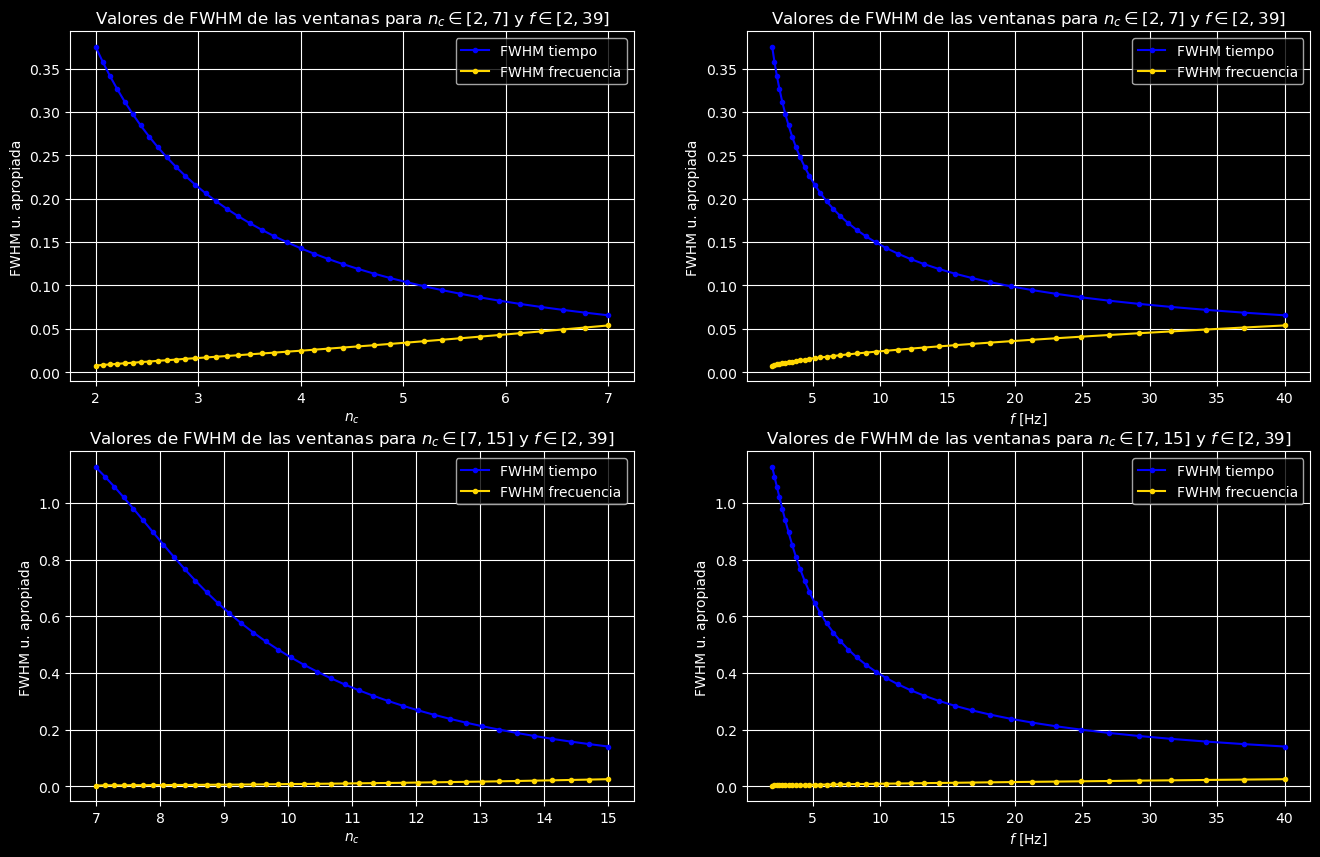

In [628]:
plt.style.use('dark_background')
fig,ax = plt.subplots(2,2,figsize=(16,10))

n_vec = np.logspace(np.log10(2),np.log10(7),39)
f_vec = np.logspace(np.log10(2),np.log10(40),39)
nt_fwhm = np.zeros(39)
nf_fwhm = np.zeros(39)
wavs = []
wavs_fft = []
twav = np.linspace(-1,1,500*2)
N = len((wv.morlet(f_vec[0],n_vec[0],twav)))
T = 1/500
fwav = sc.fft.fftfreq(N, T)[1:N//2]
for i in range(len(n_vec)):
    wavelet = wv.morlet(f_vec[i],n_vec[i],twav)
    wavelet_real = np.real(wavelet)/np.real(wavelet).max()
    gauss = wv.gauss(twav,n_vec[i],f_vec[i])
    w_fft = sc.fft.fft(wavelet_real)
    w_fft = abs(w_fft)/abs(w_fft).max()
    
    peaks_t, _ = find_peaks(gauss,1.0)
    tresults_half = peak_widths(gauss,peaks_t,rel_height=0.5)
    
    nt_fwhm[i] = tresults_half[0]/500
    
    peaks_f, _ = find_peaks(abs(w_fft[0:N//2]),1.0)
    fresults_half = peak_widths(abs(w_fft[0:N//2]),peaks_f,rel_height=0.5)
    nf_fwhm[i] = fresults_half[0]/500

ax[0][0].plot(n_vec,nt_fwhm,'.-',c='blue',label='FWHM tiempo')
ax[0][0].plot(n_vec,nf_fwhm,'.-',c='gold', label='FWHM frecuencia')
ax[0][0].set_title(f'Valores de FWHM de las ventanas para $n_c \in [{int(n_vec[0])},{int(n_vec[-1])}]$ y $f \in [{int(f_vec[0])},{int(f_vec[-1])}]$')
ax[0][0].set_xlabel(f'$n_c$')
ax[0][0].set_ylabel('FWHM u. apropiada')
ax[0][0].legend()
ax[0][0].grid()

ax[0][1].plot(f_vec,nt_fwhm,'.-',c='blue',label='FWHM tiempo')
ax[0][1].plot(f_vec,nf_fwhm,'.-',c='gold', label='FWHM frecuencia')
ax[0][1].set_title(f'Valores de FWHM de las ventanas para $n_c \in [{int(n_vec[0])},{int(n_vec[-1])}]$ y $f \in [{int(f_vec[0])},{int(f_vec[-1])}]$')
ax[0][1].set_xlabel(f'$f$ [Hz]')
ax[0][1].set_ylabel('FWHM u. apropiada')
ax[0][1].legend()
ax[0][1].grid()

n_vec = np.logspace(np.log10(7),np.log10(15),39)
f_vec = np.logspace(np.log10(2),np.log10(40),39)
nt_fwhm = np.zeros(39)
nf_fwhm = np.zeros(39)
wavs = []
wavs_fft = []
twav = np.linspace(-1,1,500*2)
N = len((wv.morlet(f_vec[0],n_vec[0],twav)))
T = 1/500
fwav = sc.fft.fftfreq(N, T)[1:N//2]
for i in range(len(n_vec)):
    wavelet = wv.morlet(f_vec[i],n_vec[i],twav)
    wavelet_real = np.real(wavelet)/np.real(wavelet).max()
    gauss = wv.gauss(twav,n_vec[i],f_vec[i])
    w_fft = sc.fft.fft(wavelet_real)
    w_fft = abs(w_fft)/abs(w_fft).max()
    
    peaks_t, _ = find_peaks(gauss,1.0)
    tresults_half = peak_widths(gauss,peaks_t,rel_height=0.5)
    
    nt_fwhm[i] = tresults_half[0]/500
    
    peaks_f, _ = find_peaks(abs(w_fft[0:N//2]),1.0)
    fresults_half = peak_widths(abs(w_fft[0:N//2]),peaks_f,rel_height=0.5)
    nf_fwhm[i] = fresults_half[0]/500

ax[1][0].plot(n_vec,nt_fwhm,'.-',c='blue',label='FWHM tiempo')
ax[1][0].plot(n_vec,nf_fwhm,'.-',c='gold', label='FWHM frecuencia')
ax[1][0].set_title(f'Valores de FWHM de las ventanas para $n_c \in [{int(n_vec[0])},{int(n_vec[-1])}]$ y $f \in [{int(f_vec[0])},{int(f_vec[-1])}]$')
ax[1][0].set_xlabel(f'$n_c$')
ax[1][0].set_ylabel('FWHM u. apropiada')
ax[1][0].legend()
ax[1][0].grid()

ax[1][1].plot(f_vec,nt_fwhm,'.-',c='blue',label='FWHM tiempo')
ax[1][1].plot(f_vec,nf_fwhm,'.-',c='gold', label='FWHM frecuencia')
ax[1][1].set_title(f'Valores de FWHM de las ventanas para $n_c \in [{int(n_vec[0])},{int(n_vec[-1])}]$ y $f \in [{int(f_vec[0])},{int(f_vec[-1])}]$')
ax[1][1].set_xlabel(f'$f$ [Hz]')
ax[1][1].set_ylabel('FWHM u. apropiada')
ax[1][1].legend()
ax[1][1].grid()
plt.show()
plt.style.use('default')

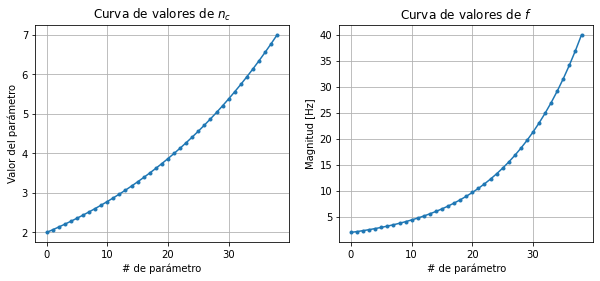

In [477]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(n_vec,'.-')
ax[0].set_title(f'Curva de valores de $n_c$')
ax[0].set_xlabel('# de parámetro')
ax[0].set_ylabel('Valor del parámetro')
ax[0].grid()

ax[1].plot(f_vec,'.-')
ax[1].set_title(f'Curva de valores de $f$')
ax[1].set_xlabel('# de parámetro')
ax[1].set_ylabel('Magnitud [Hz]')
ax[1].grid()

plt.show()

A pesar de contar con una separación logarítmica, el comportamiento de las curvas es similar, sin embargo notamos que las curvas se acercan a su intersección con menor rapidez que en el caso de la separación lineal lo que nos habla de un intercambio de resoluciones más sutil. En el panorama mayor, la elección del parámetro $n_c$, que al final del día es el que estará dictando el comportamiento de las curvas, es un a elección propia de cada situación y de cada señal de acuerdo a la precisión con la que queremos obtener el análisis. 

### Transformada Contínua Wavelet 

Habiendo discutido y revisado todos los elementos importantes anteriores, estamos en posición de definir la función que generará nuestro espectrograma de una señal. Para ello eligiremos los parámetros de la wavelet de la siguiente manera:

   * $n_c$:= número de ciclos en un intervalo de valores de $[2,7]$ espaciado logarítmicamente.
        
        
   * $f$ := frecuencia central de oscilación en un intervalo de valores de $[1,40]$ [Hz] espaciado linealmente
        

In [533]:
'''Definimos nuestra función generadora del análisis multiresolución, sus entradas serán: 
una señal "sig" una frecuencia inicial y final "fi-ff", un intervalo de frecuencia deseado, es decir el valor 
entre cada parámetro f "freq_int", un parámetro inicial y final de número de ciclos "ni-nf" para dada 
wavelet madre y frecuencia de muestreo de la señal'''

def MRA(sig,fi,ff,freq_int,ni,nf,wavelet=wv.morlet,freqm=500):
    '''Generamos los vectores de los parámetros'''
    delta = ff-fi #intervalo de frecuencias de descomposición
    k = int(delta*(1/freq_int)) # número de elementos a generar
    v_frec = np.linspace(fi,ff,k) #vector de frecuencias
    v_cycles =np.logspace(np.log10(ni), np.log10(nf),k) #vector de número de ciclos
    '''Definición de variables y la matriz donde se alojarán los resultados de las convoluciones iterativas'''
    twav = np.linspace(-1,1,freqm*2) #Definimos el vector de tiempo de la wavelet
    wav = wavelet(v_frec[0],v_cycles[0],twav,freqm) 
    n,m = len(sig),len(wav) #Obtenemos las longitudes de las señales
    p = n+m-1 #El número de puntos que contiene el resultado de la convolución
    half_wav = int(np.floor(m/2)) #Número de puntos que se añaden al inicio y al final del resultado de la convolución
    s_pad = np.pad(sig,(0,m-1),'constant') #Realizamos el padding correspondiente a la señal a analizar
    s_fft = sc.fft.fft(s_pad) #Calculamos la TF de la señal tras el padding
    conv_mat = np.zeros([k,n]) #Definimos el espacio matricial donde se almacenarán los resultados
    '''Operación de convolución aprovechando el teorema homónimo'''
    for i in range(k): 
        w = wavelet(v_frec[i],v_cycles[i],twav,freqm) #Wavelet correspondiente a los parámetros i de cada vector 
        w_pad = np.pad(w, (0,n-1),'constant') #Padding de la wavelet
        w_fft = sc.fft.fft(w_pad)  #TF de la wavelet
        w_fft = w_fft / w_fft.max() #Normalización 
        conv_res_prim = np.multiply(s_fft,w_fft) #Multiplicación punto-a-punto
        conv_res = sc.fft.ifft(conv_res_prim) #Teorema de la Convolución  
        conv_res = abs(conv_res[half_wav:-half_wav+1])**2 #Recorte del padding y obtención de la potencia
        for j in range(n):
            conv_mat[i][j] = conv_res[j] #Almacenamos el resultado en cada fila de la matriz
    return conv_mat


##### Señal de Prueba

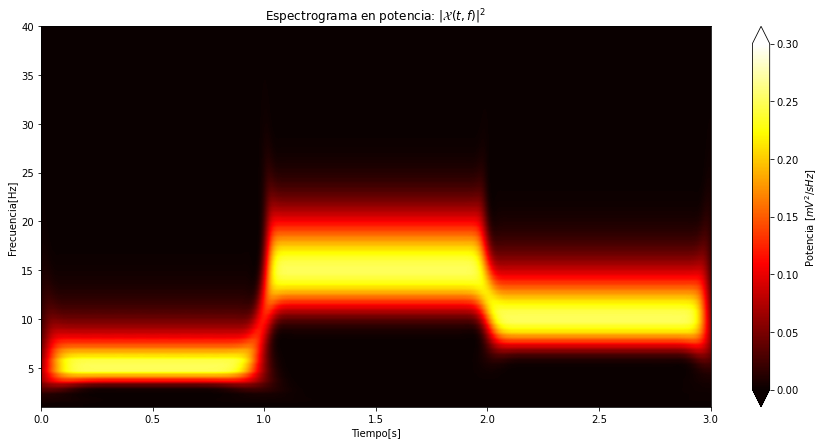

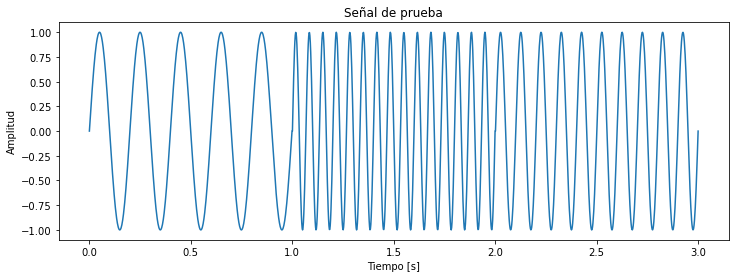

In [576]:
fi = 1 #frecuencia inicial
ff = 40 #frecuencia final
resf = 0.5 #resolución espectral
ni = 2 #número de ciclos inicial
nf = 7 #número de ciclos final
time_s = 3 #tiempo en segundos de la señal

test_spect= MRA(test,fi,ff,resf,ni,nf) #Obtenemos el espectrograma


plt.figure(figsize=(15,7)) #Declaramos el espacio de figura para graficar
#Utilizamos la función imshow para graficar las intensidades de los valores de la matriz
plt.imshow(test_spect,extent=[0,time_s,ff,fi],aspect='auto',cmap='hot') 
plt.colorbar(extend='both',label=r'Potencia $[mV^2/sHz]$')
plt.clim(0, 0.30);
plt.gca().invert_yaxis() #Acomodamos y etiquetamos los ejes
plt.xlabel('Tiempo[s]')
plt.ylabel('Frecuencia[Hz]')
plt.title(r'Espectrograma en potencia: $|\mathcal{X}(t,f)|^2$')
plt.show()

fig, ax = plt.subplots(1,figsize=(12,4))

time = np.linspace(0,3,1500) #Vector de tiempo de la señal resultante
test = probe(5,15,10,s_time)
ax.plot(time,test)
ax.set_title('Señal de prueba')
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Amplitud')
plt.show()

#### Señal de EEG

##### Importación de datos

In [545]:
#Una variable para la dirección de nuestros archivos
path = os.abspath('C:/Users/Andrew S/Documents/Trabajo/Fisica Biomedica/8vo/Servicio Social/')
#Asociamos una variable al objeto DataFrame creado apartir del archivo extensión csv
data = pd.read_csv(path +'/Jenny.csv')
EEG = data['meditacion'] #Señal EEG en reposo

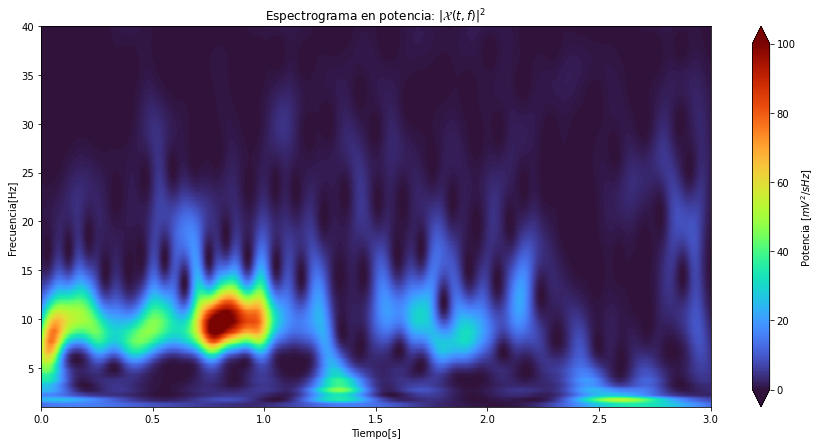

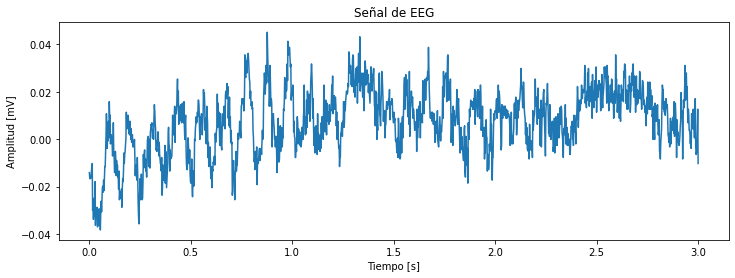

In [574]:
fi = 1 #frecuencia inicial
ff = 40 #frecuencia final
resf = 0.5 #resolución espectral
ni = 2 #número de ciclos inicial
nf = 15 #número de ciclos final
time_s = 3 #tiempo en segundos de la señal

spectro = MRA(EEG*1000,fi,ff,resf,ni,nf) #Obtenemos el espectrograma

plt.figure(figsize=(15,7)) #Declaramos el espacio de figura para graficar
#Utilizamos la función imshow para graficar las intensidades de los valores de la matriz
plt.imshow(spectro,extent=[0,time_s,ff,fi],aspect='auto',cmap='turbo') 
plt.colorbar(extend='both',label=r'Potencia $[mV^2/sHz]$')
plt.clim(0, 100);
plt.gca().invert_yaxis() #Acomodamos y etiquetamos los ejes
plt.xlabel('Tiempo[s]')
plt.ylabel('Frecuencia[Hz]')
plt.title(r'Espectrograma en potencia: $|\mathcal{X}(t,f)|^2$')
plt.show()

fig, ax = plt.subplots(1,figsize=(12,4))

time = np.linspace(0,3,1500) #Vector de tiempo de la señal resultante
test = probe(5,15,10,s_time)
ax.plot(time,EEG)
ax.set_title('Señal de EEG')
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Amplitud [mV]')
plt.show()

### Resultados y Discusión

Como podemos observar, gracias al espectrograma podemos obtener un análisis espectro-temporal  realizando un balance entre las resoluciones de los dominios complementarios, ajustando el parámetro $n_c$ a las necesidades de la aplicación. Particularmente en la señal de prueba, podemos comprobar como aparecen las frecuencias correspondientes en el momento en que están variando. Por otro lado, en el caso de señales de origen biomédico, es importante el balance entre ambas resoluciones ya que es de interés conocer que frecuencias están destacando en la señal y en qué momento del registro lo están haciendo. Por ello, también es usual realizar múltiples análisis multiresolución enfocándose en un aspecto de interés, por ejemplo: un análisis con alta resolución espectral y baja resolución temporal, un segundo con alta resolución temporal y baja resolución espectral, y finalmente uno con un balance entre las resoluciones. La naturaleza del análisis lo podemos obtener de las curvas de anchura a media altura para las ventanas espectrales y temporales, recordando que una menor anchura indica una mayor resolución. A continuación se presentan 3 análisis multiresolución  sobre la señal EEG haciéndo énfasis en distintos grados de resolución.

##### Alta resolución espectral baja temporal  $\Delta f < \Delta t$
- Alto número de ciclos $n_c$

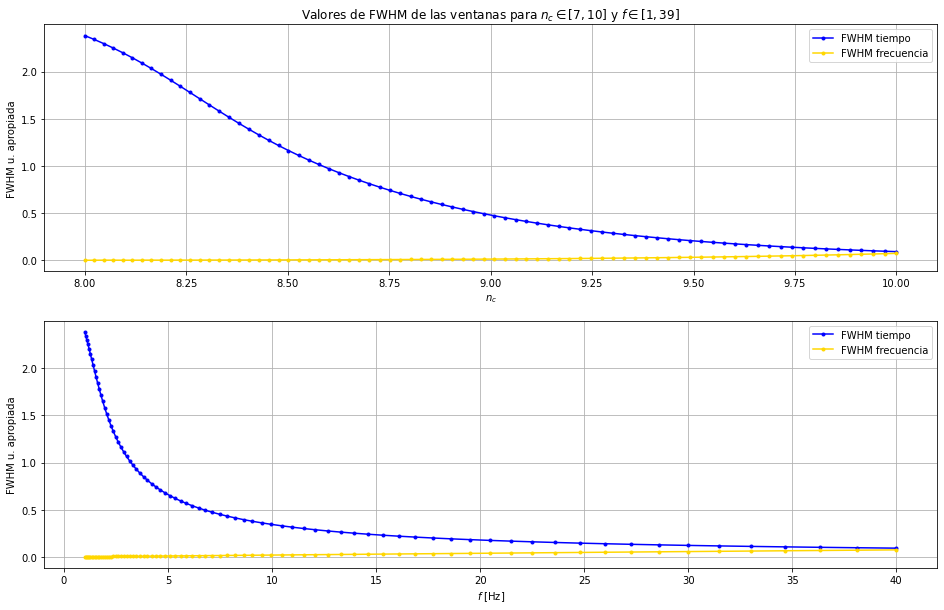

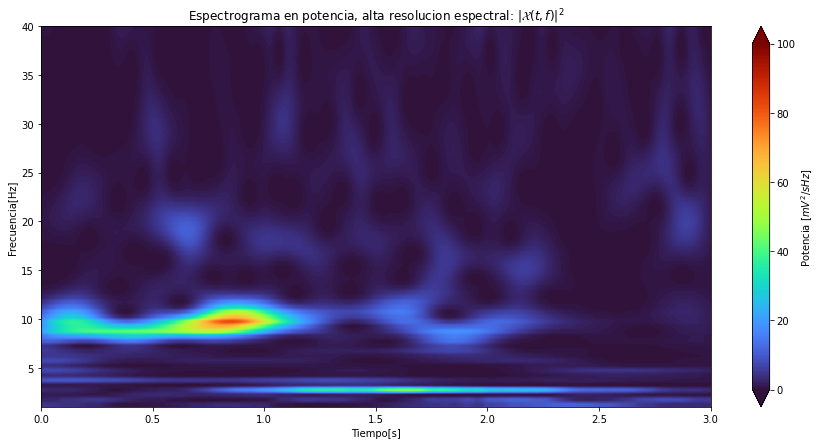

In [617]:
fi = 1 #frecuencia inicial
ff = 40 #frecuencia final
resf = 0.5 #resolución espectral
ni = 8 #número de ciclos inicial
nf = 10 #número de ciclos final
time_s = 3 #tiempo en segundos de la señal

spectro_1 = MRA(EEG*1000,fi,ff,resf,ni,nf) #Obtenemos el espectrograma

num = int((ff-fi)*(1/resf))
n_vec = np.logspace(np.log10(ni),np.log10(nf),num)
f_vec = np.logspace(np.log10(fi),np.log10(ff),num)
nt_fwhm = np.zeros(num)
nf_fwhm = np.zeros(num)
twav = np.linspace(-2,2,500*4)
N = len((wv.morlet(f_vec[0],n_vec[0],twav)))
T = 1/500
fwav = sc.fft.fftfreq(N, T)[1:N//2]
for i in range(len(n_vec)):
    wavelet = wv.morlet(f_vec[i],n_vec[i],twav)
    wavelet_real = np.real(wavelet)/np.real(wavelet).max()
    gauss = wv.gauss(twav,n_vec[i],f_vec[i])
    w_fft = sc.fft.fft(wavelet_real)
    w_fft = abs(w_fft)/abs(w_fft).max()
    peaks_t, _ = find_peaks(gauss,gauss.max())
    tresults_half = peak_widths(gauss,peaks_t,rel_height=0.5)
    nt_fwhm[i] = tresults_half[0]/500
    
    peaks_f, _ = find_peaks(abs(w_fft[0:N//2]),1.0)
    fresults_half = peak_widths(abs(w_fft[0:N//2]),peaks_f,rel_height=0.5)
    nf_fwhm[i] = fresults_half[0]/500

fig,ax = plt.subplots(2,1,figsize=(16,10))

ax[0].plot(n_vec,nt_fwhm,'.-',c='blue',label='FWHM tiempo')
ax[0].plot(n_vec,nf_fwhm,'.-',c='gold', label='FWHM frecuencia')
ax[0].set_title(f'Valores de FWHM de las ventanas para $n_c \in [{int(n_vec[0])},{int(n_vec[-1])}]$ y $f \in [{int(f_vec[0])},{int(f_vec[-1])}]$')
ax[0].set_xlabel(f'$n_c$')
ax[0].set_ylabel('FWHM u. apropiada')
ax[0].legend()
ax[0].grid()

ax[1].plot(f_vec,nt_fwhm,'.-',c='blue',label='FWHM tiempo')
ax[1].plot(f_vec,nf_fwhm,'.-',c='gold', label='FWHM frecuencia')
ax[1].set_xlabel(f'$f$ [Hz]')
ax[1].set_ylabel('FWHM u. apropiada')
ax[1].legend()
ax[1].grid()

plt.figure(figsize=(15,7)) #Declaramos el espacio de figura para graficar

plt.imshow(spectro_1,extent=[0,time_s,ff,fi],aspect='auto',cmap='turbo') 
plt.colorbar(extend='both',label=r'Potencia $[mV^2/sHz]$')
plt.clim(0, 100);
plt.gca().invert_yaxis() #Acomodamos y etiquetamos los ejes
plt.xlabel('Tiempo[s]')
plt.ylabel('Frecuencia[Hz]')
plt.title(r'Espectrograma en potencia, alta resolucion espectral: $|\mathcal{X}(t,f)|^2$')
plt.show()


##### Alta resolución temporal baja espectral  $\Delta t < \Delta f$
- Bajo número de ciclos $n_c$ 

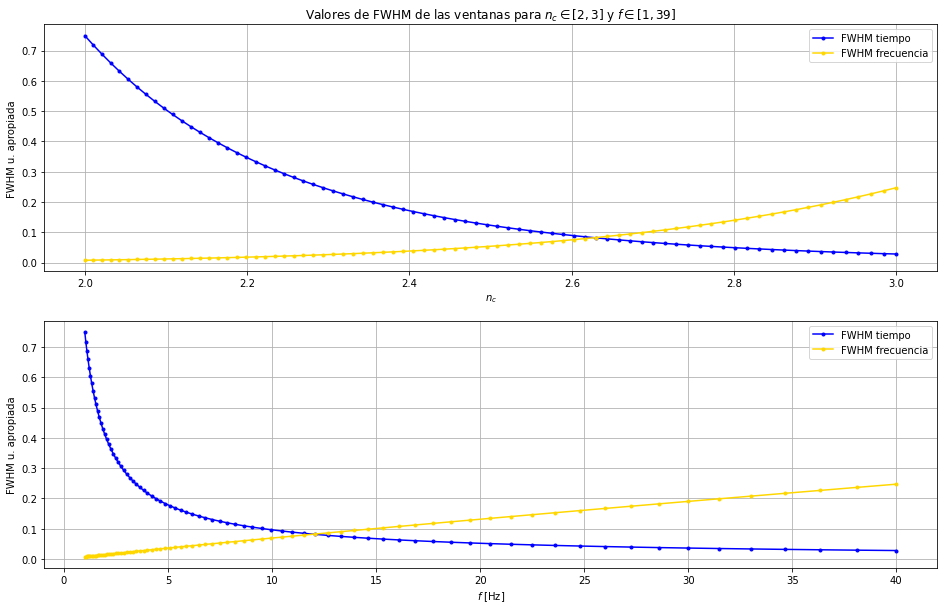

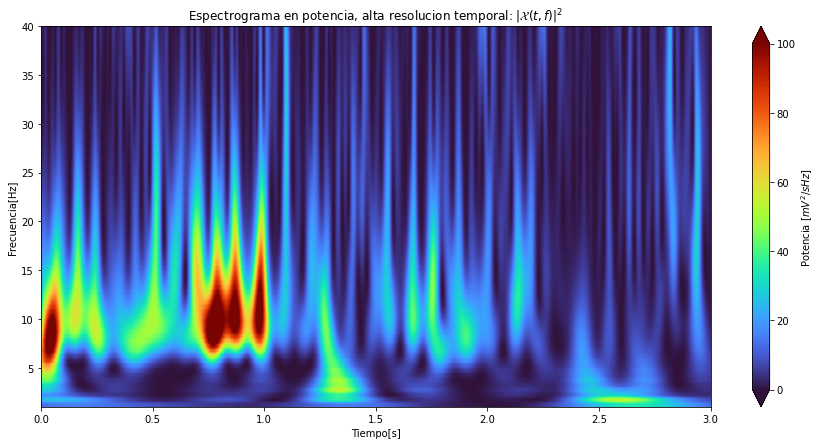

In [620]:
fi = 1 #frecuencia inicial
ff = 40 #frecuencia final
resf = 0.5 #resolución espectral
ni = 2 #número de ciclos inicial
nf = 3 #número de ciclos final
time_s = 3 #tiempo en segundos de la señal

spectro_2 = MRA(EEG*1000,fi,ff,resf,ni,nf) #Obtenemos el espectrograma

num = int((ff-fi)*(1/resf))
n_vec = np.logspace(np.log10(ni),np.log10(nf),num)
f_vec = np.logspace(np.log10(fi),np.log10(ff),num)
nt_fwhm = np.zeros(num)
nf_fwhm = np.zeros(num)
twav = np.linspace(-2,2,500*4)
N = len((wv.morlet(f_vec[0],n_vec[0],twav)))
T = 1/500
fwav = sc.fft.fftfreq(N, T)[1:N//2]
for i in range(len(n_vec)):
    wavelet = wv.morlet(f_vec[i],n_vec[i],twav)
    wavelet_real = np.real(wavelet)/np.real(wavelet).max()
    gauss = wv.gauss(twav,n_vec[i],f_vec[i])
    w_fft = sc.fft.fft(wavelet_real)
    w_fft = abs(w_fft)/abs(w_fft).max()
    peaks_t, _ = find_peaks(gauss,gauss.max())
    tresults_half = peak_widths(gauss,peaks_t,rel_height=0.5)
    nt_fwhm[i] = tresults_half[0]/500
    
    peaks_f, _ = find_peaks(abs(w_fft[0:N//2]),1.0)
    fresults_half = peak_widths(abs(w_fft[0:N//2]),peaks_f,rel_height=0.5)
    nf_fwhm[i] = fresults_half[0]/500

fig,ax = plt.subplots(2,1,figsize=(16,10))

ax[0].plot(n_vec,nt_fwhm,'.-',c='blue',label='FWHM tiempo')
ax[0].plot(n_vec,nf_fwhm,'.-',c='gold', label='FWHM frecuencia')
ax[0].set_title(f'Valores de FWHM de las ventanas para $n_c \in [{int(n_vec[0])},{int(n_vec[-1])}]$ y $f \in [{int(f_vec[0])},{int(f_vec[-1])}]$')
ax[0].set_xlabel(f'$n_c$')
ax[0].set_ylabel('FWHM u. apropiada')
ax[0].legend()
ax[0].grid()

ax[1].plot(f_vec,nt_fwhm,'.-',c='blue',label='FWHM tiempo')
ax[1].plot(f_vec,nf_fwhm,'.-',c='gold', label='FWHM frecuencia')
ax[1].set_xlabel(f'$f$ [Hz]')
ax[1].set_ylabel('FWHM u. apropiada')
ax[1].legend()
ax[1].grid()

plt.figure(figsize=(15,7)) #Declaramos el espacio de figura para graficar

plt.imshow(spectro_2,extent=[0,time_s,ff,fi],aspect='auto',cmap='turbo') 
plt.colorbar(extend='both',label=r'Potencia $[mV^2/sHz]$')
plt.clim(0, 100);
plt.gca().invert_yaxis() #Acomodamos y etiquetamos los ejes
plt.xlabel('Tiempo[s]')
plt.ylabel('Frecuencia[Hz]')
plt.title(r'Espectrograma en potencia, alta resolucion temporal: $|\mathcal{X}(t,f)|^2$')
plt.show()


##### Resoluciones equiparables  $\Delta t \approx \Delta f$
- Número de ciclos $n_c$  intermedio

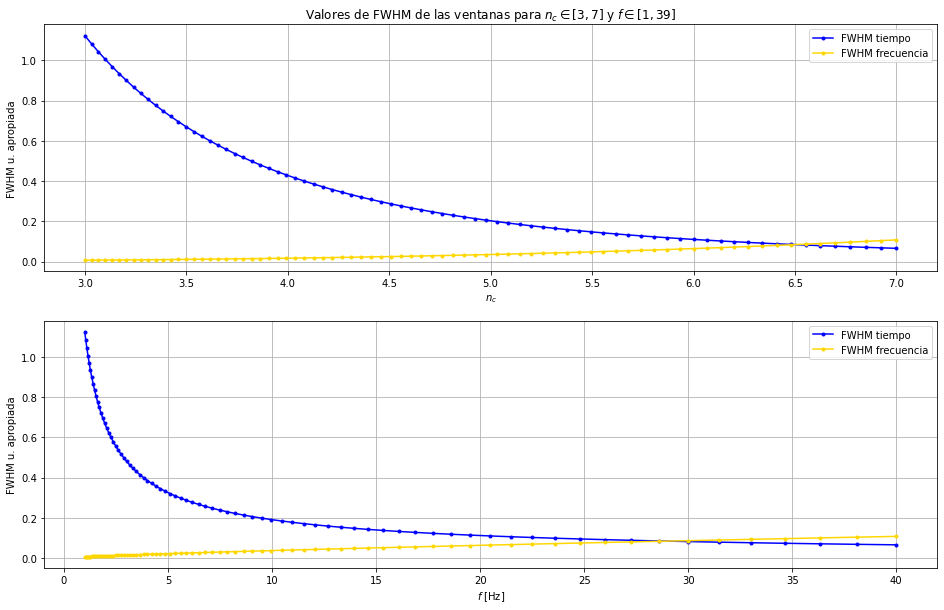

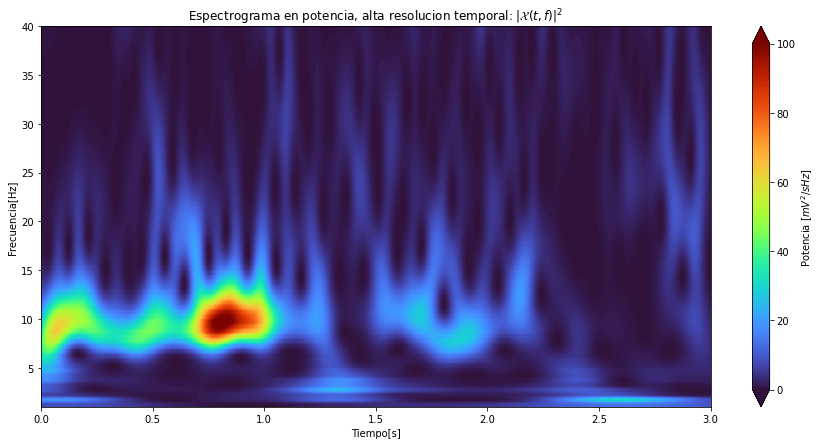

In [625]:
fi = 1 #frecuencia inicial
ff = 40 #frecuencia final
resf = 0.5 #resolución espectral
ni = 3 #número de ciclos inicial
nf = 7 #número de ciclos final
time_s = 3 #tiempo en segundos de la señal

spectro_2 = MRA(EEG*1000,fi,ff,resf,ni,nf) #Obtenemos el espectrograma

num = int((ff-fi)*(1/resf))
n_vec = np.logspace(np.log10(ni),np.log10(nf),num)
f_vec = np.logspace(np.log10(fi),np.log10(ff),num)
nt_fwhm = np.zeros(num)
nf_fwhm = np.zeros(num)
twav = np.linspace(-2,2,500*4)
N = len((wv.morlet(f_vec[0],n_vec[0],twav)))
T = 1/500
fwav = sc.fft.fftfreq(N, T)[1:N//2]
for i in range(len(n_vec)):
    wavelet = wv.morlet(f_vec[i],n_vec[i],twav)
    wavelet_real = np.real(wavelet)/np.real(wavelet).max()
    gauss = wv.gauss(twav,n_vec[i],f_vec[i])
    w_fft = sc.fft.fft(wavelet_real)
    w_fft = abs(w_fft)/abs(w_fft).max()
    peaks_t, _ = find_peaks(gauss,gauss.max())
    tresults_half = peak_widths(gauss,peaks_t,rel_height=0.5)
    nt_fwhm[i] = tresults_half[0]/500
    
    peaks_f, _ = find_peaks(abs(w_fft[0:N//2]),1.0)
    fresults_half = peak_widths(abs(w_fft[0:N//2]),peaks_f,rel_height=0.5)
    nf_fwhm[i] = fresults_half[0]/500

fig,ax = plt.subplots(2,1,figsize=(16,10))

ax[0].plot(n_vec,nt_fwhm,'.-',c='blue',label='FWHM tiempo')
ax[0].plot(n_vec,nf_fwhm,'.-',c='gold', label='FWHM frecuencia')
ax[0].set_title(f'Valores de FWHM de las ventanas para $n_c \in [{int(n_vec[0])},{int(n_vec[-1])}]$ y $f \in [{int(f_vec[0])},{int(f_vec[-1])}]$')
ax[0].set_xlabel(f'$n_c$')
ax[0].set_ylabel('FWHM u. apropiada')
ax[0].legend()
ax[0].grid()

ax[1].plot(f_vec,nt_fwhm,'.-',c='blue',label='FWHM tiempo')
ax[1].plot(f_vec,nf_fwhm,'.-',c='gold', label='FWHM frecuencia')
ax[1].set_xlabel(f'$f$ [Hz]')
ax[1].set_ylabel('FWHM u. apropiada')
ax[1].legend()
ax[1].grid()

plt.figure(figsize=(15,7)) #Declaramos el espacio de figura para graficar

plt.imshow(spectro_2,extent=[0,time_s,ff,fi],aspect='auto',cmap='turbo') 
plt.colorbar(extend='both',label=r'Potencia $[mV^2/sHz]$')
plt.clim(0, 100);
plt.gca().invert_yaxis() #Acomodamos y etiquetamos los ejes
plt.xlabel('Tiempo[s]')
plt.ylabel('Frecuencia[Hz]')
plt.title(r'Espectrograma en potencia, alta resolucion temporal: $|\mathcal{X}(t,f)|^2$')
plt.show()


De generar estos 3 distintos análisis con distintos valores de $n_c$ notamos los efectos del parámetro sobre la representación espectro-temporal obtenida por CWT. En la primera representación, valores altos del parámetro incrementan la resolución frecuencial reduciendo la temporal, mientras que en la segunda representación ocurre lo opuesto, valores bajos del parámetro incrementan la resolución temporal reduciendo la espectral. De acuerdo con Cassini (2018), en la práctica, valores alrededor de 6 otorgan buenos resultados con buen equilibrio entre ambas resoluciones.

### Análisis de resultados

Finalmente, observando cualquiera de los espectrogramas de la señal de EEG, obtenemos una representación espectro-temporal que nos arroja información respecto a la localización temporal de las distintas frecuencias asociadas a la señal, como lo pueden ser las componentes rítmicas conocidas como (Niedermayer & da silva, 2012): 

   1. Theta  $\theta \in [4,8]$ [Hz]
    
    
   2. Alfa  $\alpha \in [8,12]$ [Hz]
    
    
   3. Beta  $\beta \in [12,25]$ [Hz] 
    
    
   4. Gama  $\gamma \in [30,50]$ [Hz]

Las cuales pueden ser fácilmente identificadas en el espectrograma como ráfagas que aparecen y desaparecen de acuerdo al ensayo de registro en la técnica, para este caso al contar con registro del lóbulo occipital en condiciones de relajación con los ojos cerrados la aparición de ondas alfa es esperado ya que su activación está relacionada a la relajación mental y física con los ojos cerrados, de acuerdo con lo registrado por Hans Berger en 1929 cuando fueron descubiertas por primera vez. 

### Referencias

    1.- Cassani, R., & Falk, T. H. (2018). Spectrotemporal modeling of biomedical signals: Theoretical foundation and applications. Reference Module in Biomedical Sciences. Elsevier.
    2.- Cohen, M. X. (2019). A better way to define and describe Morlet wavelets for time-frequency analysis. NeuroImage, 199, 81-86.
    3.- Kutz, J. N.[Nathan Kutz] (2018,mayo 10). Time Frequency Analysis & Wavelets [Archivo de video] Recuperado de: https://www.youtube.com/watch?v=ViZYXxuxUKA&ab_channel=NathanKutz 
    4.- Schiff, S. J., Aldroubi, A., Unser, M., & Sato, S. (1994). Fast wavelet transformation of EEG. Electroencephalography and clinical neurophysiology, 91(6), 442-455. 
    5.- Rioul, O., & Vetterli, M. (1991). Wavelets and signal processing. IEEE signal processing magazine, 8(4), 14-38.
    6.- Farnsworth, B. (2019). Eeg (electroencephalography): The complete pocket guide. Global HQ: Copenhagen, Denmark.
    7.- Niedermeyer, E., & Da Silva, F. L. (2020). Electroencephalography--Basic principles, clinical applications, and related fields. Urban & Schwarzenberg,.